#                                                 Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

In [60]:
##### Load the Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [61]:
##### Load The Datasets
Customer_df = pd.read_csv('customer_churn.csv')

In [62]:
Customer_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##### Lets start with EDA

In [63]:
#### check the shape of datasets
Customer_df.shape

(7043, 21)

##### 7043 rows
##### 21 columns

In [64]:
###### check the data types information
Customer_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [65]:
Customer_df['TotalCharges'] = Customer_df['TotalCharges'].replace([" "],np.nan)

In [66]:
Customer_df['TotalCharges'].isnull().sum()

11

In [67]:
median = Customer_df['TotalCharges'].median()
Customer_df['TotalCharges']=Customer_df['TotalCharges'].fillna(median)

In [68]:
Customer_df['TotalCharges']=pd.to_numeric(Customer_df['TotalCharges'])

In [69]:
Customer_df['TotalCharges'].dtype

dtype('float64')

In [70]:
Customer_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [71]:
##### check catagorical columns
columns =[columns for columns in Customer_df.columns if Customer_df[columns].dtypes == 'object']
columns

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [72]:
#### check the continous columns
cont_col = [cont_col for cont_col in Customer_Customer_df.columns if Customer_df[cont_col].dtypes!='object']
cont_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [73]:
#### check for the null values
Customer_df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
#### check the count of the null values
Customer_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### NO Missing value is found in dataset

In [75]:
##### store catagorical value in separate variable
catagorical_col = Customer_df[columns]

In [76]:
catagorical_col

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


<AxesSubplot:>

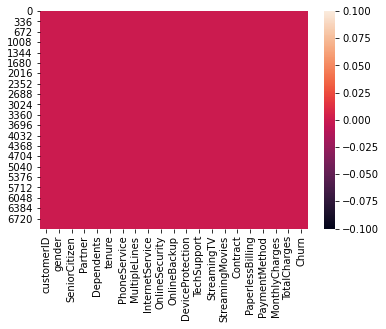

In [77]:
##### Visualization on graph
sns.heatmap(Customer_df.isnull())

In [78]:
Customer_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='count'>

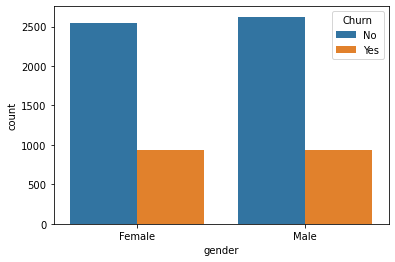

In [79]:
##### Comparision of chrun with gender
sns.countplot(x='gender',hue='Churn',data=Customer_df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

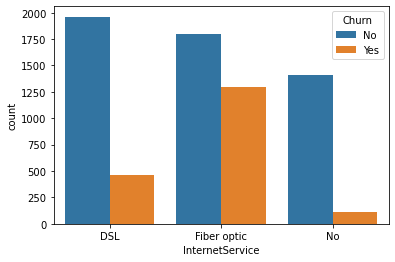

In [80]:
sns.countplot(x='InternetService',hue='Churn',data=Customer_df)

##### from above graph its shows that Fiber Optoc internet service maximum churn

<AxesSubplot:xlabel='Contract', ylabel='count'>

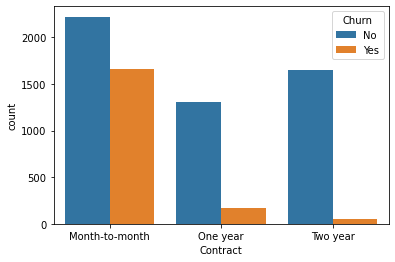

In [81]:
sns.countplot(x='Contract',hue='Churn',data=Customer_df)

##### Month to Month have maximum chruned is showing

<AxesSubplot:xlabel='Partner', ylabel='count'>

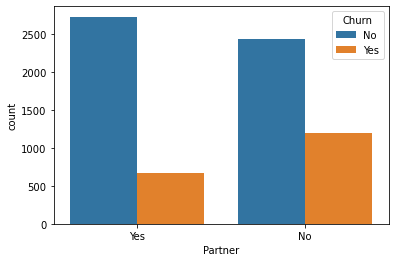

In [82]:
sns.countplot(x='Partner',hue='Churn',data=Customer_df)

##### 1400 hundered customer churned with no partner

<AxesSubplot:xlabel='Dependents', ylabel='count'>

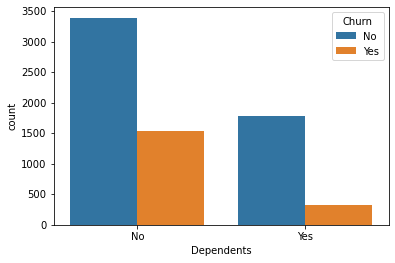

In [83]:
sns.countplot(x='Dependents',hue='Churn',data=Customer_df)

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

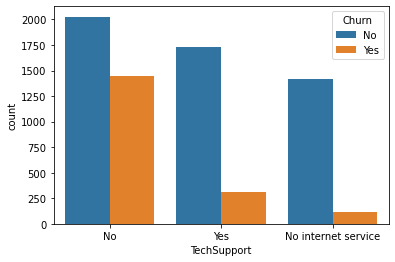

In [84]:
sns.countplot(x='TechSupport',hue='Churn',data=Customer_df)

##### customer also max churned with no techsupport

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

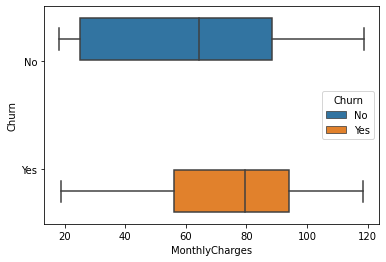

In [85]:
sns.boxplot(x='MonthlyCharges',y='Churn',hue='Churn',data=Customer_df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

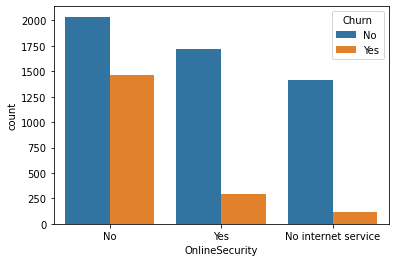

In [86]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=Customer_df)

###### it seems to in graph that customer with No Online security mostly churned

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

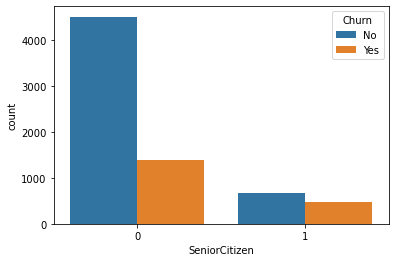

In [87]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=Customer_df)

##### mostly no senior citizen churned 

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

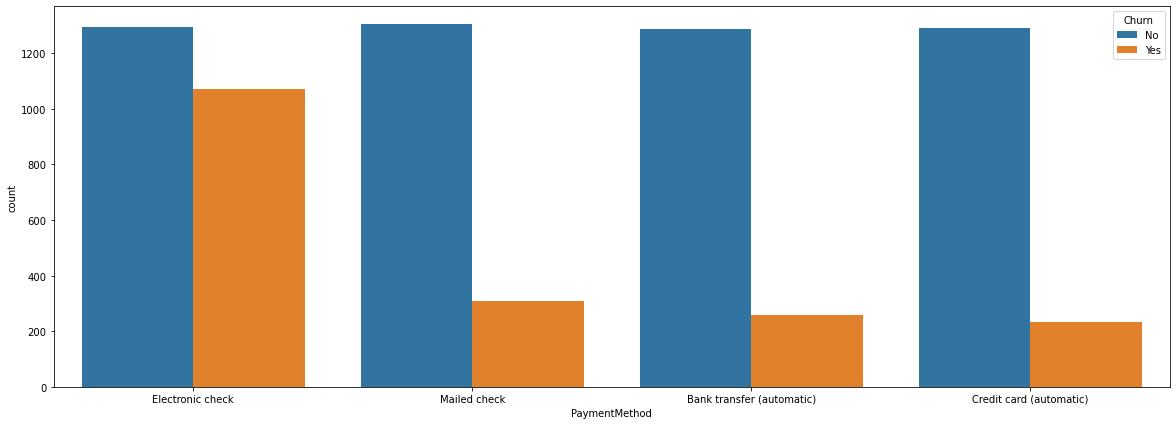

In [88]:
plt.figure(figsize=(20,7))
sns.countplot(x='PaymentMethod',hue='Churn',data=Customer_df)

##### customer with electronic check payment method chured more while credit card (automatic) least

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

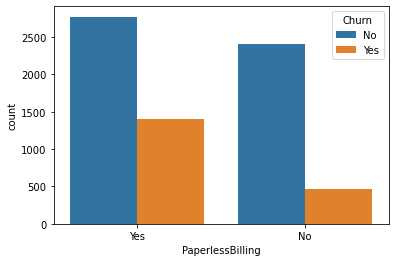

In [89]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=Customer_df)

##### Paper less Billing Customer Churned More 

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

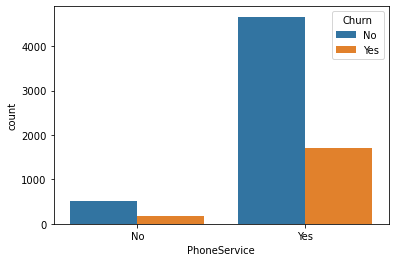

In [90]:
sns.countplot(x='PhoneService',hue='Churn',data=Customer_df)

##### Phone Service With yes Churned More

<AxesSubplot:xlabel='tenure', ylabel='count'>

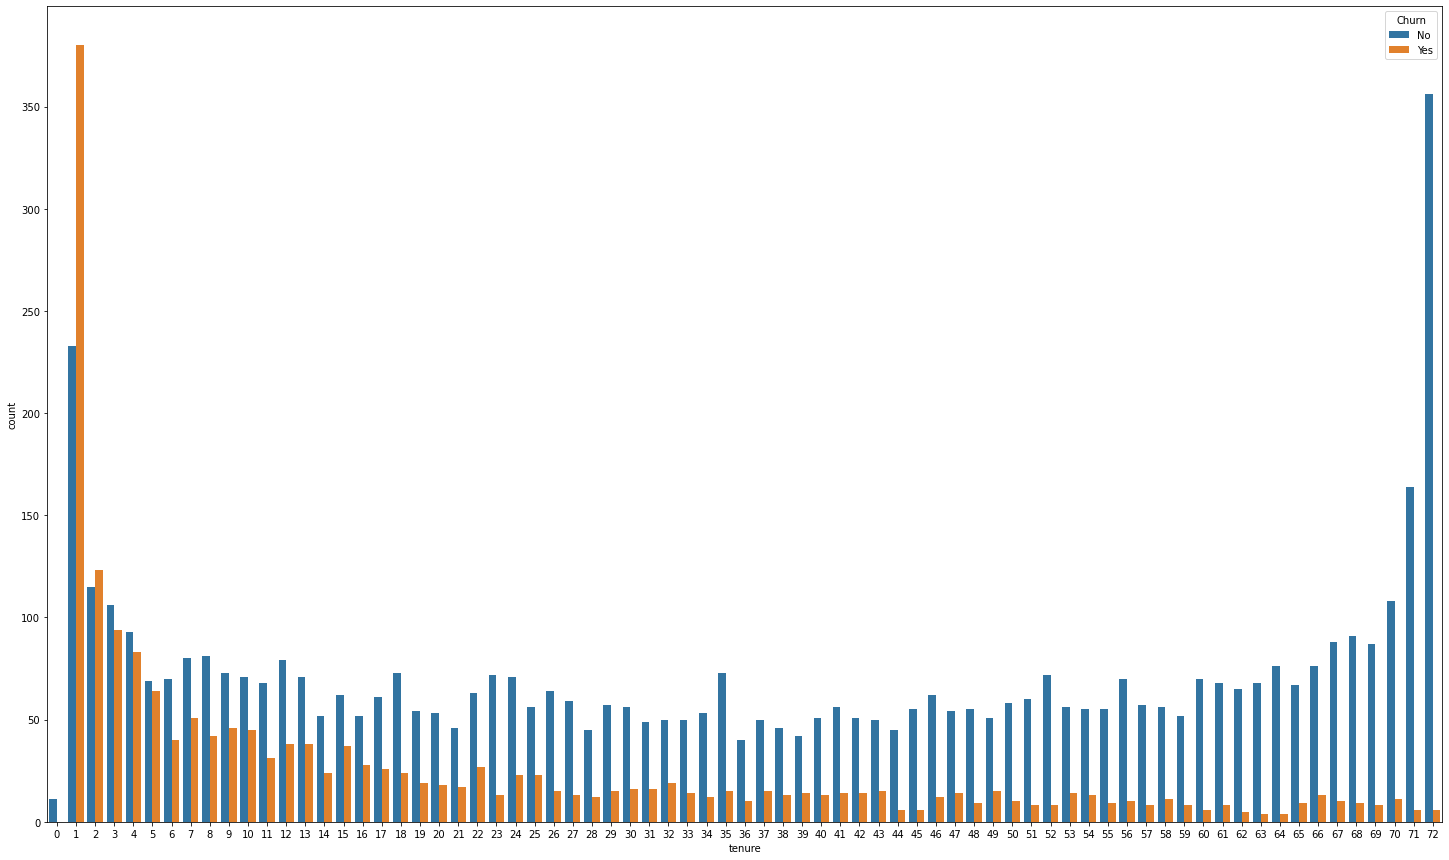

In [91]:
plt.figure(figsize=(25,15))
sns.countplot(x='tenure',hue='Churn',data=Customer_df)

##### 1 has max lever of customer churned while 72 have very least means more tenure less chance of customer churned

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

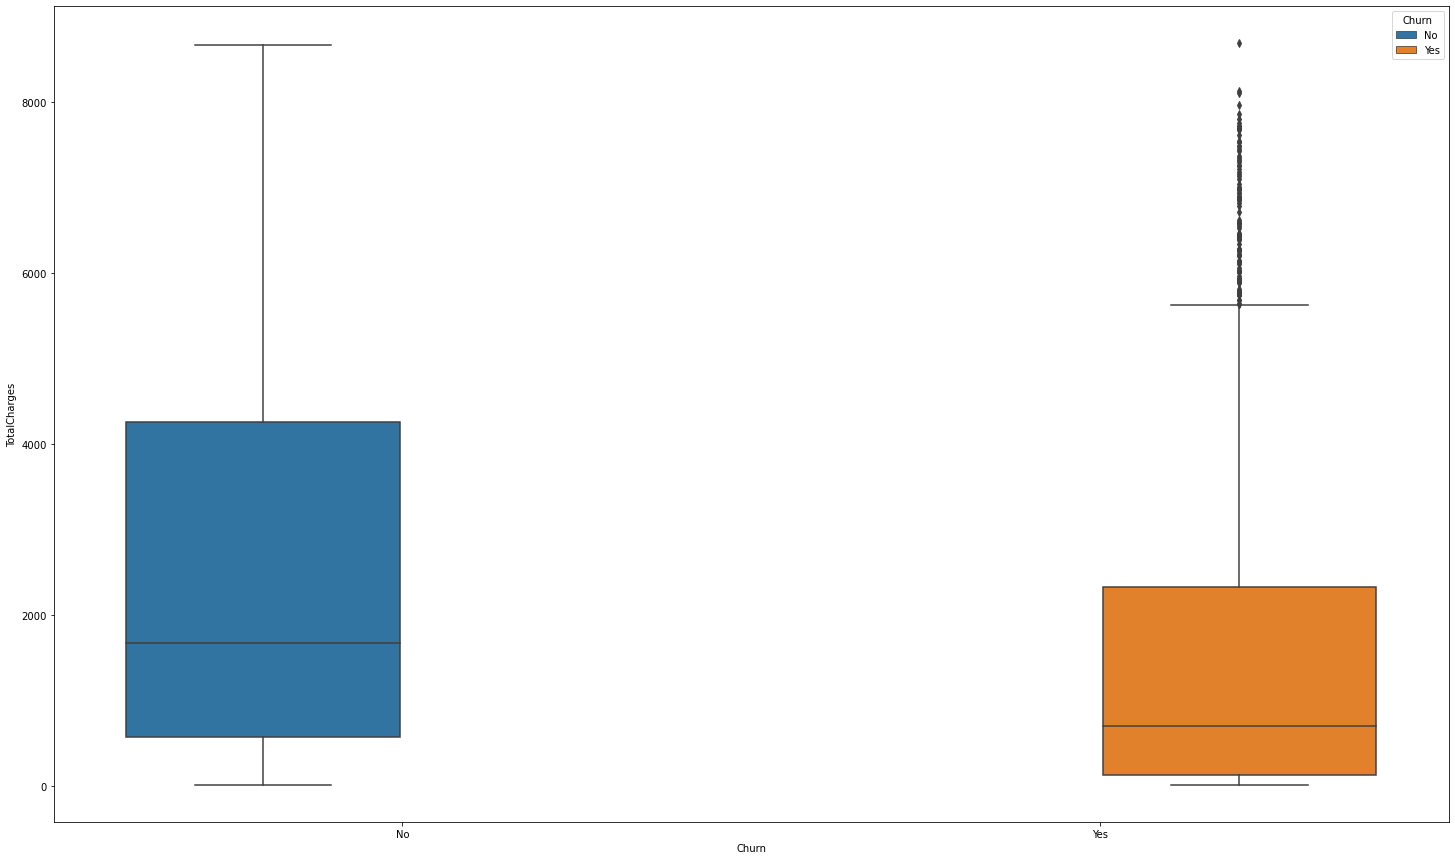

In [92]:
plt.figure(figsize=(25,15))
sns.boxplot(y='TotalCharges',x='Churn',hue='Churn',data=Customer_df)

##### as per total charges churned is less shwoing one of the good reason is showing

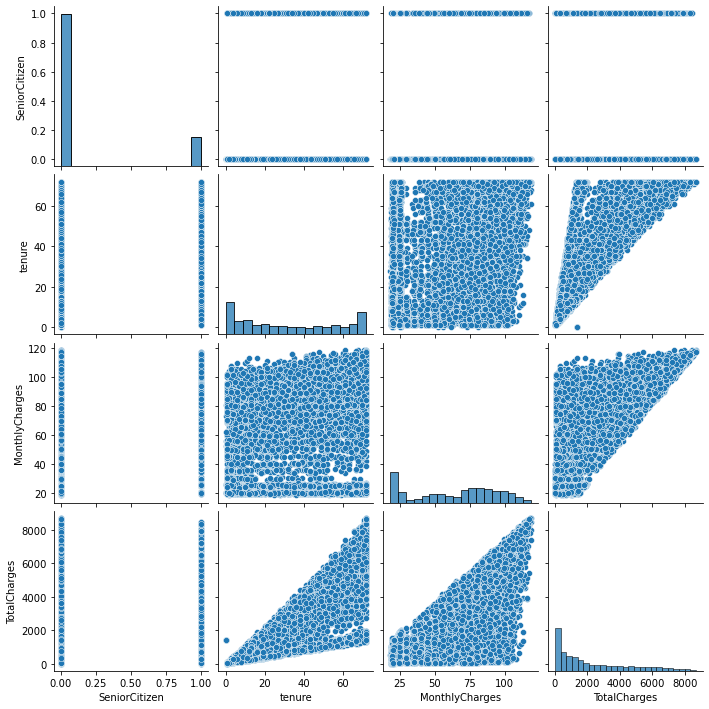

In [93]:
sns.pairplot(Customer_df)

<AxesSubplot:>

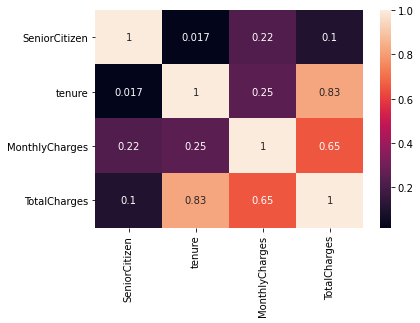

In [94]:
sns.heatmap(Customer_df.corr(),annot=True)

#### corelation between columns is more up to remark

<AxesSubplot:xlabel='tenure'>

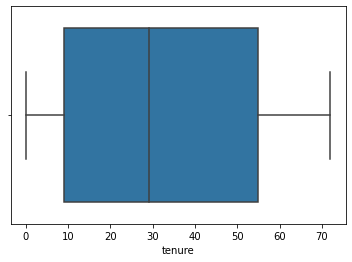

In [95]:
##### chech for outliers 
sns.boxplot(Customer_df['tenure'])

<AxesSubplot:xlabel='MonthlyCharges'>

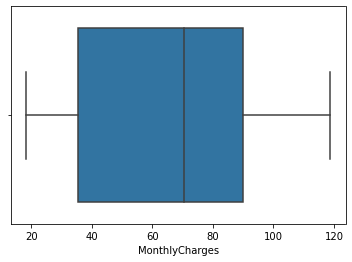

In [96]:
sns.boxplot(Customer_df['MonthlyCharges'])

##### data is clean no outliers fount in continous data

##### data Cleaning and Preprocessing


In [97]:
#### lets handle the outliers

##### check for the outliers in continous column
def check_outlier(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

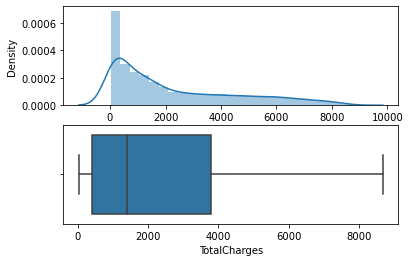

In [98]:
check_outlier(Customer_df,'TotalCharges')

In [99]:
Customer_df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

In [100]:
#### found skewness in total charges which is continous is nature
Customer_df['TotalCharges'] = np.sqrt(Customer_df['TotalCharges'])

In [101]:
Customer_df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.309838
dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

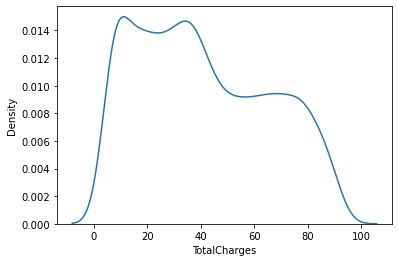

In [102]:
sns.kdeplot(Customer_df['TotalCharges'])

In [103]:
##### Remove the skewness from the columns

In [104]:
catagorical_col

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [105]:
catagorical_col['customerID'].unique

<bound method Series.unique of 0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object>

In [106]:
##### Customer id is unique id so it can be droped because it not effect the churned 

In [107]:
catagorical_col.drop(['customerID'],axis=1,inplace=True)

In [108]:
catagorical_col

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [109]:
cont_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [110]:
continous_column = Customer_df[cont_col]

In [111]:
continous_column

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,5.463515
1,0,34,56.95,43.468379
2,0,2,53.85,10.399519
3,0,45,42.30,42.903963
4,0,2,70.70,12.314625
...,...,...,...,...
7038,0,24,84.80,44.615020
7039,0,72,103.20,85.807342
7040,0,11,29.60,18.613167
7041,1,4,74.40,17.509997


In [112]:
continous_column['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [113]:
senior_citizen = continous_column['SeniorCitizen']

In [114]:
senior_citizen = pd.DataFrame(senior_citizen,columns=['SeniorCitizen'])

In [115]:
senior_citizen

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


In [116]:
##### drop the Senoior Citizen from Cotinous_col
continous_column.drop(['SeniorCitizen'],axis=1,inplace=True)

In [117]:
continous_column

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,5.463515
1,34,56.95,43.468379
2,2,53.85,10.399519
3,45,42.30,42.903963
4,2,70.70,12.314625
...,...,...,...
7038,24,84.80,44.615020
7039,72,103.20,85.807342
7040,11,29.60,18.613167
7041,4,74.40,17.509997


###### Scaling of Data

##### ordinal data -- Data are in order --> labelEncoder

##### Continous data - used standardscaler

##### import the scaling Libraries

In [118]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le=LabelEncoder()

In [119]:
for i in catagorical_col.columns:
    catagorical_col[i] = le.fit_transform(catagorical_col[i])

In [120]:
catagorical_col

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [121]:
continous_column.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [122]:
sc = StandardScaler()

In [123]:
continous_column = sc.fit_transform(continous_column)

In [124]:
continous_column = pd.DataFrame(continous_column,columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

In [125]:
continous_column

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-1.449035
1,0.066327,-0.259629,0.100847
2,-1.236724,-0.362660,-1.247739
3,0.514251,-0.746535,0.077829
4,-1.236724,0.197365,-1.169639
...,...,...,...
7038,-0.340876,0.665992,0.147608
7039,1.613701,1.277533,1.827479
7040,-0.870241,-1.168632,-0.912777
7041,-1.155283,0.320338,-0.957766


In [126]:
##### lets peprare the final dataset
final_df = pd.concat([continous_column,senior_citizen,catagorical_col],axis=1)

In [127]:
final_df

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.277445,-1.160323,-1.449035,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0.066327,-0.259629,0.100847,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,-1.236724,-0.362660,-1.247739,0,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0.514251,-0.746535,0.077829,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,-1.236724,0.197365,-1.169639,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,0.147608,0,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,1.613701,1.277533,1.827479,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,-0.870241,-1.168632,-0.912777,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,-1.155283,0.320338,-0.957766,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


##### Modeling

In [128]:
#### separate x and y from final_df as feature and target valriable

x = final_df.drop(['Churn'],axis=1)
y= final_df['Churn']

In [129]:
x

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-1.277445,-1.160323,-1.449035,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0.066327,-0.259629,0.100847,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,-1.236724,-0.362660,-1.247739,0,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0.514251,-0.746535,0.077829,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,-1.236724,0.197365,-1.169639,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,0.147608,0,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,1.613701,1.277533,1.827479,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,-0.870241,-1.168632,-0.912777,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,-1.155283,0.320338,-0.957766,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [130]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

#### import training and model related libraries

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [132]:
#### Find the best Random State
maxAcc =0
maxRs =0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=i)
    classifier = LogisticRegression()
    classifier.fit(x_train,y_train)
    pred = classifier.predict(x_test)
    accu = accuracy_score(y_test,pred)
    if accu>maxAcc:
        maxAcc = accu
        maxRs = i
print('Best Accuracy =',maxAcc,'Best Random State =',maxRs)

Best Accuracy = 0.8262350936967632 Best Random State = 14


In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=14)

In [134]:
def predict(ml_model):
    print('Model is : {}'.format(ml_model))
    model = ml_model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    Accuracy = accuracy_score(y_test,prediction)
    classification_score = classification_report(y_test,prediction)
   
    cv_score = cross_val_score(model,x,y,cv=5).mean()
    print('Accuracy Score :', accu)
    print('Classification Score :', classification_score)
    print('confusion Matrix :', confusion_matrix)
    print('Cv_score :',cv_score)

In [135]:
predict(LogisticRegression())

Model is : LogisticRegression()
Accuracy Score : 0.7967064168086314
Classification Score :               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1322
           1       0.68      0.58      0.62       439

    accuracy                           0.83      1761
   macro avg       0.77      0.74      0.76      1761
weighted avg       0.82      0.83      0.82      1761

confusion Matrix : <function confusion_matrix at 0x000002023D648790>
Cv_score : 0.8046299358023099


In [136]:
predict(RandomForestClassifier())

Model is : RandomForestClassifier()
Accuracy Score : 0.7967064168086314
Classification Score :               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1322
           1       0.62      0.53      0.57       439

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.80      1761

confusion Matrix : <function confusion_matrix at 0x000002023D648790>
Cv_score : 0.7897222199819344


In [137]:
predict(ExtraTreesClassifier())

Model is : ExtraTreesClassifier()
Accuracy Score : 0.7967064168086314
Classification Score :               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1322
           1       0.59      0.52      0.55       439

    accuracy                           0.79      1761
   macro avg       0.72      0.70      0.71      1761
weighted avg       0.78      0.79      0.79      1761

confusion Matrix : <function confusion_matrix at 0x000002023D648790>
Cv_score : 0.7809183253758307


In [138]:
predict(AdaBoostClassifier())

Model is : AdaBoostClassifier()
Accuracy Score : 0.7967064168086314
Classification Score :               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1322
           1       0.66      0.61      0.63       439

    accuracy                           0.82      1761
   macro avg       0.76      0.75      0.76      1761
weighted avg       0.82      0.82      0.82      1761

confusion Matrix : <function confusion_matrix at 0x000002023D648790>
Cv_score : 0.8034927656623008


In [139]:
predict(SVC(kernel='poly'))

Model is : SVC(kernel='poly')
Accuracy Score : 0.7967064168086314
Classification Score :               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1322
           1       0.67      0.48      0.56       439

    accuracy                           0.81      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.80      0.81      0.80      1761

confusion Matrix : <function confusion_matrix at 0x000002023D648790>
Cv_score : 0.7988089957416606


In [140]:
predict(SVC(kernel='rbf'))

Model is : SVC()
Accuracy Score : 0.7967064168086314
Classification Score :               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1322
           1       0.66      0.54      0.60       439

    accuracy                           0.82      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.81      0.82      0.81      1761

confusion Matrix : <function confusion_matrix at 0x000002023D648790>
Cv_score : 0.7986675551648494


In [141]:
predict(SVC(kernel='sigmoid'))

Model is : SVC(kernel='sigmoid')
Accuracy Score : 0.7967064168086314
Classification Score :               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1322
           1       0.42      0.47      0.45       439

    accuracy                           0.71      1761
   macro avg       0.62      0.63      0.62      1761
weighted avg       0.72      0.71      0.71      1761

confusion Matrix : <function confusion_matrix at 0x000002023D648790>
Cv_score : 0.6970077706626234


In [142]:
#### lets Hyper tune the model for better accurracy

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [145]:

GCV=GridSearchCV(LogisticRegression(),param_grid,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [146]:
GCV.best_params_

{'C': 0.4393970560760795}

In [147]:
Final_model=LogisticRegression(C=0.4393970560760795)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)

82.56672345258376


In [148]:
##### Accuracy Has been increased

In [149]:
##### Auc And Roc

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [151]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

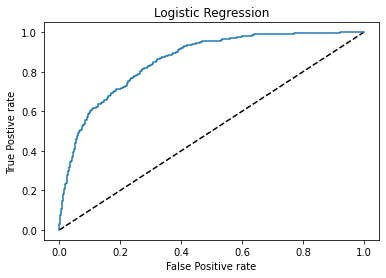

In [152]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Postive rate')
plt.title('Logistic Regression')
plt.show()

In [154]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
auc_score

0.7442905930477395